# 1. Cifar 图像数据分析

* 创建数据文件夹，用于存放数据

In [3]:
!ls data/
!mkdir data/cifar10
!ls data/

data68
cifar10  data68


* 解压数据到新创建的文件夹

In [4]:
!unzip -q /home/aistudio/data/data68/cifar-10-batches-py.zip -d data/cifar10/

* 查看解压文件的内容

In [5]:
!ls -R -l data/cifar10/

data/cifar10/:
total 181876
-rw-r--r-- 1 aistudio users      158 Mar 31  2009 batches.meta
-rw-r--r-- 1 aistudio users 31035704 Mar 31  2009 data_batch_1
-rw-r--r-- 1 aistudio users 31035320 Mar 31  2009 data_batch_2
-rw-r--r-- 1 aistudio users 31035999 Mar 31  2009 data_batch_3
-rw-r--r-- 1 aistudio users 31035696 Mar 31  2009 data_batch_4
-rw-r--r-- 1 aistudio users 31035623 Mar 31  2009 data_batch_5
-rw-r--r-- 1 aistudio users       88 Jun  5  2009 readme.html
-rw-r--r-- 1 aistudio users 31035526 Mar 31  2009 test_batch


* 定义 `unpickle` 函数用于解析文件(关于文件的说明参考[cifar](http://www.cs.toronto.edu/~kriz/cifar.html))
* 定义 `get_data_info`函数用于打印每个文件的信息

In [6]:
def unpickle(file):
    import cPickle
    with open(file, 'rb') as f:
        dict = cPickle.load(f)
    return dict
    
    
def get_data_info(data_name):
    data = unpickle(data_name)
    print('| ' + '-'*30)
    print('| Info: {}'.format(data['batch_label']))
    print('| data shape: {}'.format(data['data'].shape))
    print('| labels length: {}'.format(len(data['labels'])))
    print('| length of filenames list: {}'.format(len(data['filenames'])))
    

* 压缩文件包含文件 **data_batch_1**，**data_batch_2**，**data_batch_3**，**data_batch_4**, **data_batch_5**，**test_batch**以及**batches.meta**；
* 通过`unpickle`解析文件后会得到一个字典，字典键值包括`['data', 'labels', 'batch_label', 'filenames']`；
* **data**: 一个10000x3072 uint8s 的 numpy 数组。阵列的每一行都存储一个32x32的彩色图像。3072 列分别为 1024 列红色通道，1024 列绿色通道，1024 列蓝色通道，图像以行主顺序存储，因此数组的前 32 个条目是图像第一行的红色通道值。
* **labels**: 0-9 范围内的 10000 个数字列表。索引 *i* 处的数字表示阵列数据中第 *i* 个图像的标签
* **label_name**: 该字典信息存储在 **batches.meta** 文件中；

* 查看数据文件字典的键值

In [7]:
print('keys of train dict: {}'.format(list(unpickle('data/cifar10/data_batch_1'))))

keys of train dict: ['data', 'labels', 'batch_label', 'filenames']


* 打印 5 个训练数据文件和测试文件的数据信息

In [8]:
for i in range(5):
    get_data_info('data/cifar10/data_batch_{}'.format(i+1))
    
get_data_info('data/cifar10/test_batch')


| ------------------------------
| Info: training batch 1 of 5
| data shape: (10000, 3072)
| labels length: 10000
| length of filenames list: 10000
| ------------------------------
| Info: training batch 2 of 5
| data shape: (10000, 3072)
| labels length: 10000
| length of filenames list: 10000
| ------------------------------
| Info: training batch 3 of 5
| data shape: (10000, 3072)
| labels length: 10000
| length of filenames list: 10000
| ------------------------------
| Info: training batch 4 of 5
| data shape: (10000, 3072)
| labels length: 10000
| length of filenames list: 10000
| ------------------------------
| Info: training batch 5 of 5
| data shape: (10000, 3072)
| labels length: 10000
| length of filenames list: 10000
| ------------------------------
| Info: testing batch 1 of 1
| data shape: (10000, 3072)
| labels length: 10000
| length of filenames list: 10000


* 读取 batches.meta 文件，并打印字典信息

图像总共有10类，每一个类别对应于一个数字，具体的对应关系如下表所示：

|类别索引|0|1|2|3|4|5|6|7|8|9|
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|Class Name|airplane|automobile|bird|cat|deer|dog|frog|horse|ship|truck|
|类别名称|飞机|汽车|鸟|猫|鹿|狗|青蛙|马|船|卡车|

In [9]:
from pprint import pprint
batch_meta = unpickle('data/cifar10/batches.meta')
print('keys of dict: {}'.format(list(batch_meta)))
pprint(batch_meta)

keys of dict: ['num_cases_per_batch', 'label_names', 'num_vis']
{'label_names': ['airplane',
                 'automobile',
                 'bird',
                 'cat',
                 'deer',
                 'dog',
                 'frog',
                 'horse',
                 'ship',
                 'truck'],
 'num_cases_per_batch': 10000,
 'num_vis': 3072}


In [10]:
# class_name = {}
# for i in range(10):
#     class_name[i] = batch_meta['label_names'][i]
    
# print(class_name)
class_name = {
    0: 'airplane', 
    1: 'automobile',
    2: 'bird', 
    3: 'cat', 
    4: 'deer', 
    5: 'dog', 
    6: 'frog', 
    7: 'horse', 
    8: 'ship', 
    9: 'truck'
}

* 为了能够在后边通过图像的方式进行展示，这里获取每个类别的10条数据

In [11]:
data = unpickle('data/cifar10/data_batch_1')
imgs = {i:[] for i in range(10)}
labels = {i:0 for i in range(10)}
data_imgs = data['data']
data_labels = data['labels']
class_set = set()
end_flag = False
for i in range(len(data_labels)):
    label = data_labels[i]
    if labels[label] < 10:
        imgs[label].append(data_imgs[i])
        labels[label] += 1
    for i in range(10):
        if labels[label] == 10:
            class_set.add(label)
            if len(class_set) == 10:
                end_flag = True
    if end_flag:
        break


In [9]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# fig = plt.figure(figsize=(16, 16))
# plt.subplots_adjust(wspace =0, hspace =0)
# for i in range(10):
#     for j in range(10):
#         plt.subplot(10, 10, 10*i+j+1)
#         img = imgs[i][j].reshape(3, 32, 32).transpose(1, 2, 0)
#         plt.axis('off')
#         if j == 0:
#             plt.ylabel(class_name[i])
#         plt.imshow(img)
# plt.show()



* 对数据集图像进行展示，以便有个直观的了解

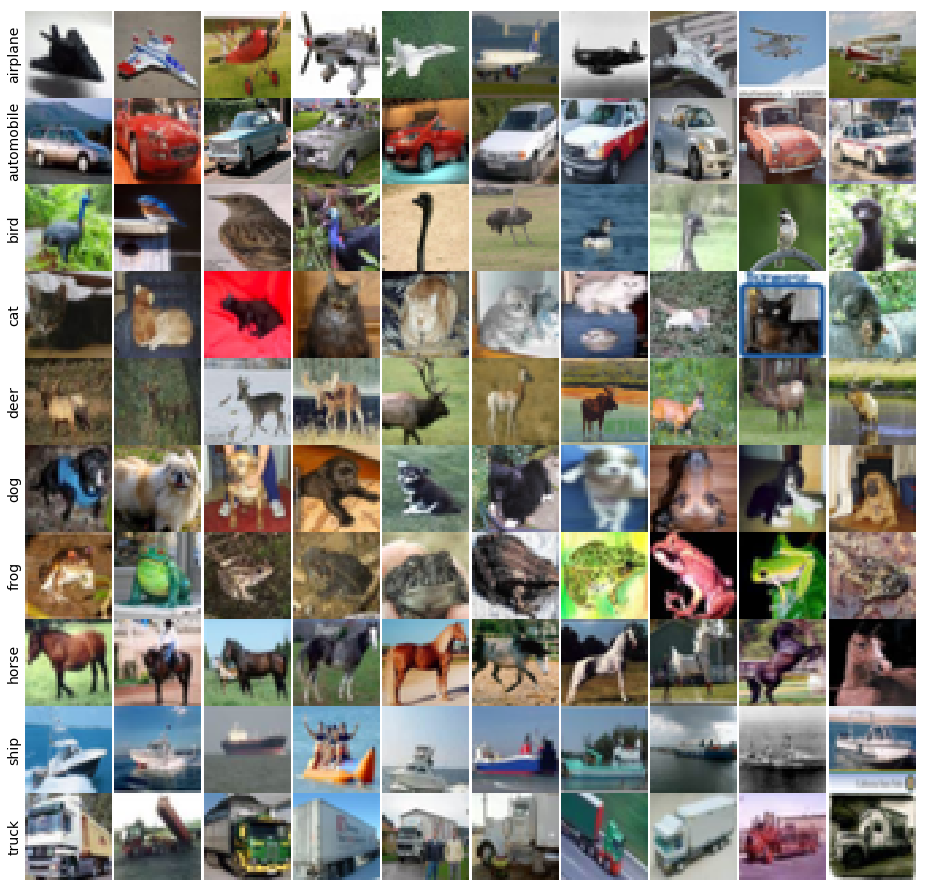

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(nrows=10, ncols=10, sharex=True, sharey=True, figsize=(16, 16))
plt.subplots_adjust(wspace =0, hspace =0)

for i, row in enumerate(axs):
    for j, cell in enumerate(row):
        img = imgs[i][j].reshape(3, 32, 32).transpose(1, 2, 0)
        cell.imshow(img)
        plt.xticks([])
        plt.yticks([])
        cell.spines['top'].set_visible(False)
        cell.spines['bottom'].set_visible(False)
        cell.spines['left'].set_visible(False)
        cell.spines['right'].set_visible(False)
        # cell.axis('off')
        if j == 0:
            cell.set_ylabel(class_name[i], fontsize=14)
        
plt.show()

* 导入依赖库

In [13]:
import six
import numpy as np
import cPickle
import paddle
import paddle.fluid as fluid
import os
import sys

* 自定义 reader 函数，因为解压缩数据集文件后会得到5个训练文件和1个测试文件，因此 `reader_creater` 需要传入一个字符串或者列表，代表文件名或者文件名列表。

In [14]:
def reader_creater(filename):
    if not isinstance(filename, str) and not isinstance(filename, list):
        print('Type error: filename must be list or str!')
        return 
    if isinstance(filename, str):
        filename = [filename]
    
    def read_batch(batch):
        data = batch[six.b('data')]
        labels = batch[six.b('labels')]
        for img, label in six.moves.zip(data, labels):
            yield (img/255.0).astype(np.float32), int(label)
            
    def reader():
        for file in filename:
            with open(file, 'rb') as f:
                batch = cPickle.load(f)
                
            for item in read_batch(batch):
                yield item
                
    return reader
    
        

* 定义batch size 和执行场所

In [16]:
BATCH_SIZE = 32
use_cuda = False
place = fluid.core.CUDAPlace(0) if use_cuda else fluid.core.CPUPlace()



* 定义 `train_reader` 和 `test_reader` 分别用于训练配置的训练和测试

In [17]:
train_list = [os.path.join('data/cifar10', p) for p in os.listdir('data/cifar10') if 'data' in p]
test_list = ['data/cifar10/test_batch']

# train data will shuffle
train_reader = paddle.batch(
    paddle.reader.shuffle(reader_creater(train_list), buf_size=128*100), 
    batch_size=BATCH_SIZE)
    
# test data will not shuffle
test_reader = paddle.batch(reader_creater(test_list), batch_size=BATCH_SIZE)


* 构建 ResNet 网络

In [18]:
def conv_bn_layer(input,  ch_out, filter_size, stride, padding, act='relu', bias_attr=False):
    tmp = fluid.layers.conv2d(
        input=input,
        filter_size=filter_size,
        num_filters=ch_out,
        stride=stride,
        padding=padding,
        act=None,
        bias_attr=bias_attr)
    return fluid.layers.batch_norm(input=tmp, act=act)


def shortcut(input, ch_in, ch_out, stride):
    if ch_in != ch_out:
        return conv_bn_layer(input, ch_out, 1, stride, 0, None)
    else:
        return input


def basicblock(input, ch_in, ch_out, stride):
    tmp = conv_bn_layer(input, ch_out, 3, stride, 1)
    tmp = conv_bn_layer(tmp, ch_out, 3, 1, 1, act=None, bias_attr=True)
    short = shortcut(input, ch_in, ch_out, stride)
    return fluid.layers.elementwise_add(x=tmp, y=short, act='relu')


def layer_warp(block_func, input, ch_in, ch_out, count, stride):
    tmp = block_func(input, ch_in, ch_out, stride)
    for i in range(1, count):
        tmp = block_func(tmp, ch_out, ch_out, 1)
    return tmp


def resnet_cifar10(ipt, depth=32):
    # depth should be one of 20, 32, 44, 56, 110, 1202
    assert (depth - 2) % 6 == 0
    n = (depth - 2) // 6
    nStages = {16, 64, 128}
    conv1 = conv_bn_layer(ipt, ch_out=16, filter_size=3, stride=1, padding=1)
    res1 = layer_warp(basicblock, conv1, 16, 16, n, 1)
    res2 = layer_warp(basicblock, res1, 16, 32, n, 2)
    res3 = layer_warp(basicblock, res2, 32, 64, n, 2)
    pool = fluid.layers.pool2d(
        input=res3, pool_size=8, pool_type='avg', pool_stride=1)
    predict = fluid.layers.fc(input=pool, size=10, act='softmax')
    return predict

* 进行网络配置

In [19]:
main_program = fluid.default_main_program()
startup_program = fluid.default_startup_program()

image = fluid.layers.data(name='image', shape=[3, 32, 32], dtype='float32')
label = fluid.layers.data(name='label', shape=[1], dtype='int64')
feeder = fluid.DataFeeder(feed_list=[image, label], place=place)
predict = resnet_cifar10(image, depth=32)

cost = fluid.layers.cross_entropy(input=predict, label=label)
mean_cost = fluid.layers.mean(cost)
accracy = fluid.layers.accuracy(input=predict, label=label)

test_program = main_program.clone(for_test=True)

optimizer = fluid.optimizer.Adam(learning_rate=0.001)
optimizer.minimize(mean_cost)

exe = fluid.Executor(place)
exe.run(startup_program)

[]

* 模型训练，这里为了看看效果只在 CPU 上训练了 1 个 epoch， 如果在GPU上训练，可以将上面的 BATCH_SIZE 调大一点。

In [21]:
save_path = "model/image_classification_resnet.inference.model"
EPOCHS = 1
step = 0

for pass_id in range(EPOCHS):
    for step_id, data_train in enumerate(train_reader()):
        out = exe.run(main_program, feed=feeder.feed(data_train), fetch_list=[mean_cost, accracy])
        if step_id % 100 == 0:
            # each 100 step, print train info
            print('\npass: {}, Batch： {}, loss: {}, accracy: {}'.format(pass_id, step_id, out[0], out[1]))
        else:
            sys.stdout.write('=')
            sys.stdout.flush()
            
        step += 1
    
    # after a epoch, test on test data
    acc_set = []
    mean_loss_set = []    
    for test_id, data_test in enumerate(test_reader()):
        mean_loss_np, accuracy_np = exe.run(test_program, feed=feeder.feed(data_test), fetch_list=[mean_cost, accracy])
        mean_loss_set.append(float(mean_loss_np))
        acc_set.append(float(accuracy_np))
    mean_cost_val = np.array(mean_loss_set).mean()
    acc_val = np.array(acc_set).mean()
    print('\nTest - Epoch: {}, loss: {}, accuracy: {}'.format(pass_id, mean_cost_val, acc_val))
    
    # after a epoch, save model
    if save_path is not None:
        fluid.io.save_inference_model(save_path, feeded_var_names=['image'], target_vars=[predict], executor=exe)
        



pass: 0, Batch： 0, loss: [1.0606213], accracy: [0.59375]
pass: 0, Batch： 100, loss: [0.99008507], accracy: [0.59375]
pass: 0, Batch： 200, loss: [1.0226649], accracy: [0.59375]
pass: 0, Batch： 300, loss: [0.7524361], accracy: [0.71875]
pass: 0, Batch： 400, loss: [1.1547946], accracy: [0.5]
pass: 0, Batch： 500, loss: [1.0091699], accracy: [0.71875]
pass: 0, Batch： 600, loss: [0.97109854], accracy: [0.8125]
pass: 0, Batch： 700, loss: [0.9303476], accracy: [0.625]
pass: 0, Batch： 800, loss: [0.70178795], accracy: [0.75]
pass: 0, Batch： 900, loss: [0.8830618], accracy: [0.625]
pass: 0, Batch： 1000, loss: [0.57118237], accracy: [0.84375]
pass: 0, Batch： 1100, loss: [0.5209462], accracy: [0.78125]
pass: 0, Batch： 1200, loss: [1.0031245], accracy: [0.59375]
pass: 0, Batch： 1300, loss: [0.9467058], accracy: [0.75]
pass: 0, Batch： 1400, loss: [0.6266982], accracy: [0.65625]
pass: 0, Batch： 1500, loss: [0.6389406], accracy: [0.65625]
Test - Epoch: 0, loss: 0.787498522109, accuracy: 0.72284345047

* 使用 test_reader 来进行测试

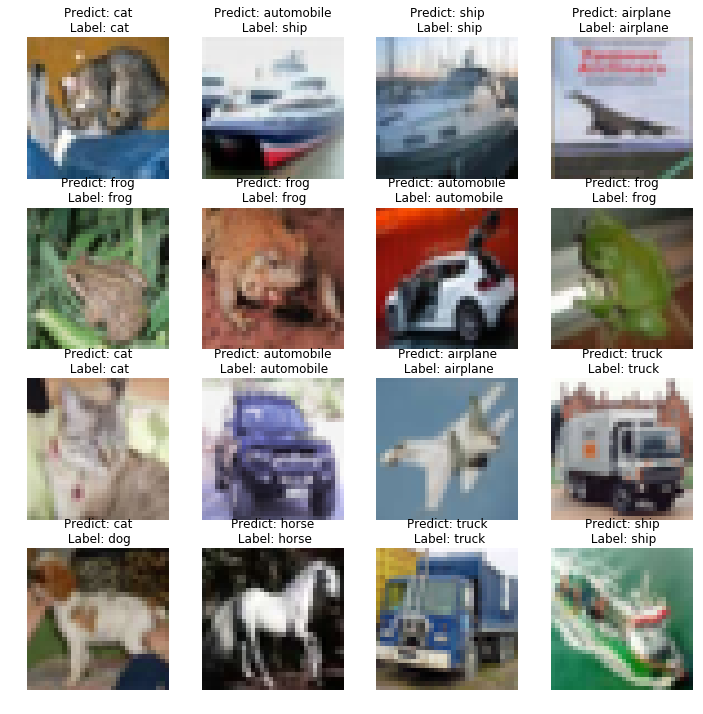

In [74]:
save_path = "model/image_classification_resnet.inference.model"
use_cuda = False

place = fluid.core.CUDAPlace(0) if use_cuda else fluid.core.CPUPlace()
exe = fluid.Executor(place)

test_reader = paddle.batch(reader_creater(['data/cifar10/test_batch']), batch_size=16)

inference_scope = fluid.core.Scope()

with fluid.scope_guard(inference_scope):
    [inference_program, feed_target_names, fetch_targets] = fluid.io.load_inference_model(save_path, exe)
    test_d = test_reader().next()
    fig = plt.figure(figsize=(12, 12))
    for i, (data, label) in enumerate(test_d):
        plt.subplot(4, 4, i+1)
        img = np.array(data).reshape(3, 32, 32).transpose(1, 2, 0)
        img_pre = np.expand_dims(np.array(data).reshape(3, 32, 32), axis=0)
        results = exe.run(
            inference_program, 
            feed={feed_target_names[0]: img_pre}, 
            fetch_list=fetch_targets)
        pred = np.argmax(results)
        plt.imshow(img)
        plt.title('Predict: {}\n Label: {}'.format(class_name[pred], class_name[label]))
        plt.axis('off')
    plt.show()

* 使用图像来进行推断测试

In [80]:
from PIL import Image

def load_image(infer_file):
    im = Image.open(infer_file)
    im = im.resize((32, 32), Image.ANTIALIAS)

    im = np.array(im).astype(np.float32)

    im = im.transpose((2, 0, 1))  # CHW
    im = im / 255.0

    # Add one dimension to mimic the list format.
    im = np.expand_dims(im, axis=0)
    return im

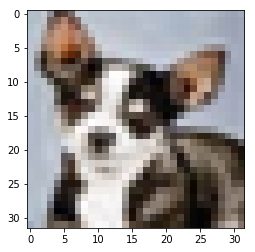

Infer results: dog


In [84]:
save_path = "model/image_classification_resnet.inference.model"
use_cuda = False

place = fluid.core.CUDAPlace(0) if use_cuda else fluid.core.CPUPlace()
exe = fluid.Executor(place)

img = load_image('/home/aistudio/data/data3405/dog.png')
plt.imshow(img[0].transpose(1, 2, 0))
plt.show()

inference_scope = fluid.core.Scope()

with fluid.scope_guard(inference_scope):
    [inference_program, feed_target_names, fetch_targets] = fluid.io.load_inference_model(save_path, exe)
    results = exe.run(
            inference_program,
            feed={feed_target_names[0]: img},
            fetch_list=fetch_targets)
    print("Infer results: {}".format(class_name[np.argmax(results[0])]))